# Predict Car Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# get the data using data.csv file
car_price_data = pd.read_csv('data.csv')
car_price_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
# check the car_price_data dataset shape 
car_price_data.shape

(11914, 16)

In [4]:
# check dataset columns
car_price_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
# check the information about car_price_data dataset
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# check null values in the car_price_data dataset
car_price_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
# handle missing values in the car_price_data dataset
car_price_data['Engine Fuel Type'].fillna('unknown', inplace=True)
car_price_data['Engine HP'].fillna(car_price_data['Engine HP'].mean(), inplace=True)
car_price_data['Engine Cylinders'].fillna(car_price_data['Engine Cylinders'].median(), inplace=True)
car_price_data['Number of Doors'].fillna(car_price_data['Number of Doors'].median(), inplace=True)
car_price_data['Market Category'].fillna('unknown', inplace=True)

car_price_data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [8]:
# Check unique entries of Engine Fuel Type
car_price_data['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
unknown                                            3
natural gas                                        2
Name: count, dtype: int64

In [9]:
# reduce unique entries of Engine Fuel Type
def add_engine_fuel_type(fuel_type):
    if fuel_type == 'regular unleaded' or fuel_type == 'premium unleaded (required)' or fuel_type == 'premium unleaded (recommended)' or fuel_type == 'flex-fuel (unleaded/E85)':
        return fuel_type
    else:
        return 'other'
    
car_price_data['Engine Fuel Type'] = car_price_data['Engine Fuel Type'].apply(add_engine_fuel_type)

car_price_data['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
other                              311
Name: count, dtype: int64

In [10]:
# Check unique entries of Engine Vehicle Style
car_price_data['Vehicle Style'].value_counts()

Vehicle Style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: count, dtype: int64

In [11]:
# reduce unique entries of Vehicle Style
def add_vehicle_style(vehicle_style):
    if vehicle_style == '2dr SUV' or vehicle_style == 'Passenger Van' or vehicle_style == 'Cargo Van' or vehicle_style == 'Cargo Minivan'or vehicle_style == 'Convertible SUV':
        return 'Other'
    else:
        return vehicle_style
    
car_price_data['Vehicle Style'] = car_price_data['Vehicle Style'].apply(add_vehicle_style)

car_price_data['Vehicle Style'].value_counts()

Vehicle Style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Other                   461
Passenger Minivan       417
Regular Cab Pickup      392
Name: count, dtype: int64

In [12]:
# Check unique entries of Make
car_price_data['Make'].value_counts()

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [13]:
# Check unique entries of Model
car_price_data['Model'].value_counts()

Model
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
MKZ Hybrid              1
M4 GTS                  1
LFA                     1
Horizon                 1
Zephyr                  1
Name: count, Length: 915, dtype: int64

In [14]:
# Check unique entries of Market Category
car_price_data['Market Category'].value_counts()

Market Category
unknown                                            3742
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 72, dtype: int64

In [15]:
# remove Make, Model and Market Category columns
car_price_data = car_price_data.drop(columns=['Make', 'Model', 'Market Category'])

car_price_data

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [16]:
# get all data as numeric values
car_price_data = pd.get_dummies(car_price_data, dtype=np.int8)

car_price_data

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_other,...,Vehicle Style_4dr SUV,Vehicle Style_Convertible,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Other,Vehicle Style_Passenger Minivan,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = car_price_data.drop('MSRP', axis=1)
X

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_other,Engine Fuel Type_premium unleaded (recommended),...,Vehicle Style_4dr SUV,Vehicle Style_Convertible,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Other,Vehicle Style_Passenger Minivan,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = car_price_data['MSRP']
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [19]:
# split dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
# train the model
model_random_forest_regressor = RandomForestRegressor()
model_random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# get the score of the model
score = model_random_forest_regressor.score(X_test, y_test)
print(str(model_random_forest_regressor)+ '=>' + str(score))

RandomForestRegressor()=>0.8328231532738501


In [22]:
# predict prices of the cars using Random Forest Regression
y_pred = model_random_forest_regressor.predict(X_test)
y_pred

array([33278.71240079, 58463.515     , 81025.78446429, ...,
        2000.        , 27738.88003968, 29998.06559524])

In [23]:
# calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("RMSE:", rmse)

RMSE: 25147.647616055525


In [24]:
# calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 3727.1889896344464


In [25]:
# calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.8328231532738501


In [26]:
# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

MAPE: 8.750519940706965


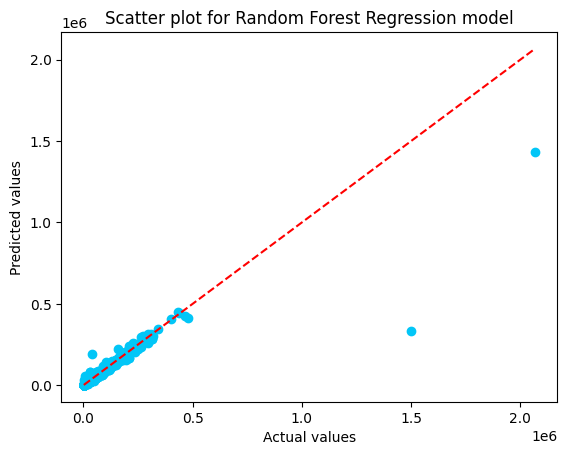

In [27]:
# Create scatter plot for predicted values vs. the actual values of Random Forest Regression model

plt.scatter(y_test, y_pred, color='#02c6f7')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot for Random Forest Regression model')

plt.show()

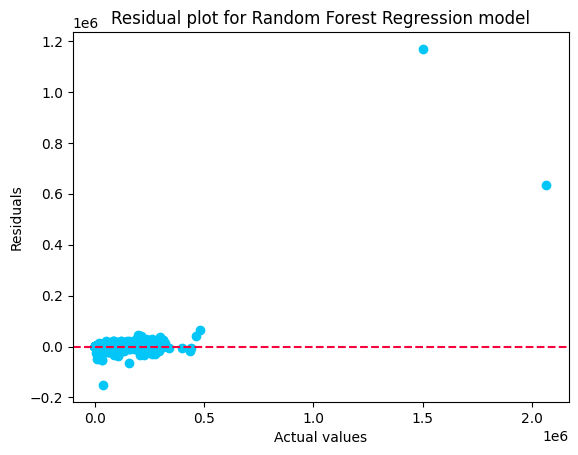

In [28]:
# Create residual plot for residuals vs. the actual values of Random Forest Regression model
residuals = y_test - y_pred

plt.scatter(y_test, residuals, color='#02c6f7')
plt.axhline(y=0, color='#f7023c', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual plot for Random Forest Regression model')

plt.show()

In [29]:
model_decision_tree_regressor = DecisionTreeRegressor()
model_decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
score = model_decision_tree_regressor.score(X_test, y_test)
print(str(model_decision_tree_regressor)+ '=>' + str(score))

DecisionTreeRegressor()=>0.8419822191955382


In [31]:
y_pred = model_decision_tree_regressor.predict(X_test)

In [32]:
# calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("RMSE:", rmse)

RMSE: 24449.066432269443


In [33]:
# calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 3799.659586017466


In [34]:
# calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.8419822191955382


In [35]:
# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

MAPE: 8.403602821979355


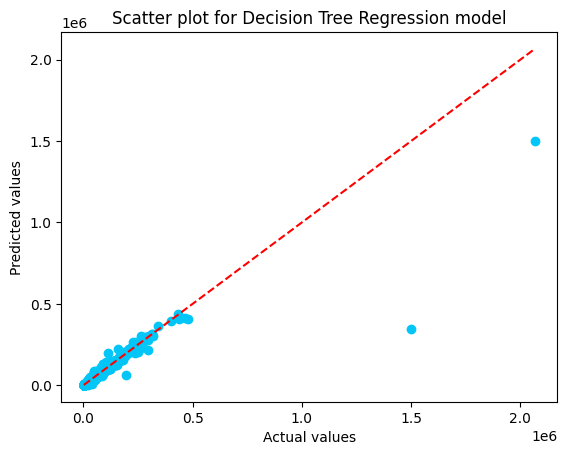

In [36]:
# Create scatter plot for predicted values vs. the actual values of Decision Tree Regression model
plt.scatter(y_test, y_pred, color='#02c6f7')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot for Decision Tree Regression model')

# Display the plot
plt.show()

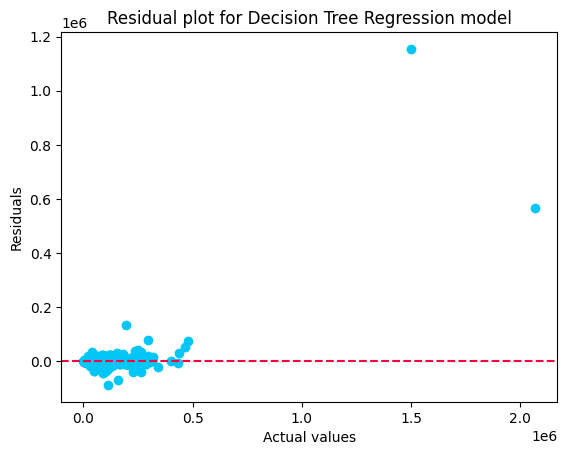

In [37]:
# Create residual plot forresiduals vs. the actual values of Decision Tree Regression model
residuals = y_test - y_pred

plt.scatter(y_test, residuals, color='#02c6f7')
plt.axhline(y=0, color='#f7023c', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual plot for Decision Tree Regression model')

plt.show()

In [38]:
model_gradient_boosting_regressor = GradientBoostingRegressor()
model_gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [39]:
score = model_gradient_boosting_regressor.score(X_test, y_test)
print(str(model_gradient_boosting_regressor)+ '=>' + str(score))

GradientBoostingRegressor()=>0.8377278801706085


In [40]:
y_pred = model_gradient_boosting_regressor.predict(X_test)

In [41]:
# calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("RMSE:", rmse)

RMSE: 24776.003644689354


In [42]:
# calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 6340.9782060470725


In [43]:
# calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.8377278801706085


In [44]:
# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

MAPE: 27.669123762487224


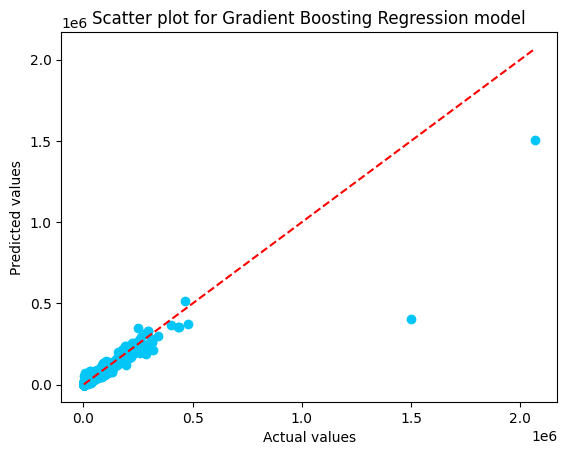

In [45]:
# Create scatter plot for predicted values vs. the actual values of Gradient Boosting Regression model
plt.scatter(y_test, y_pred, color='#02c6f7')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot for Gradient Boosting Regression model')

plt.show()

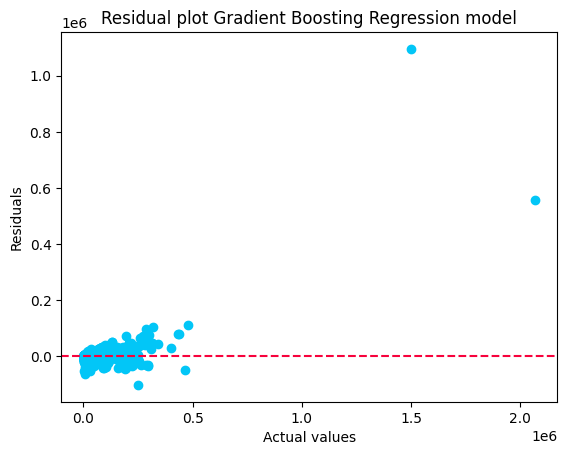

In [46]:
# Create residual plot for residuals vs. the actual values of Gradient Boosting Regression model
residuals = y_test - y_pred

plt.scatter(y_test, residuals, color='#02c6f7')
plt.axhline(y=0, color='#f7023c', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual plot Gradient Boosting Regression model')

plt.show()

In [47]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

LinearRegression()

In [48]:
score = model_linear_regression.score(X_test, y_test)
print(str(model_linear_regression)+ '=>' + str(score))

LinearRegression()=>0.4333683453507131


In [49]:
y_pred = model_linear_regression.predict(X_test)

In [50]:
# calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print("RMSE:", rmse)

RMSE: 46297.732116322455


In [51]:
# calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 18331.79738499734


In [52]:
# calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.4333683453507131


In [53]:
# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape)

MAPE: 138.08460937890433


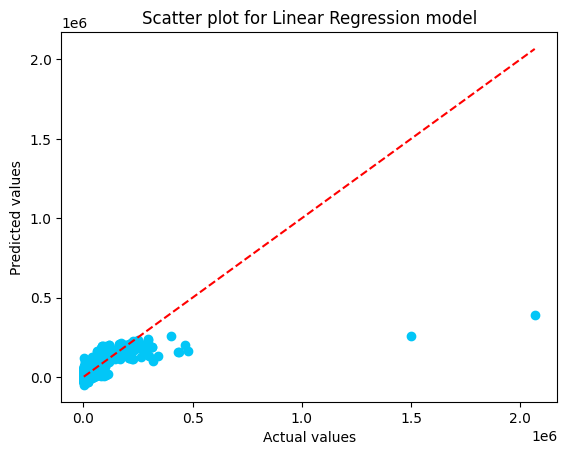

In [54]:
# Create scatter plot for predicted values vs. the actual values of Linear Regression model
plt.scatter(y_test, y_pred, color='#02c6f7')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter plot for Linear Regression model')

plt.show()

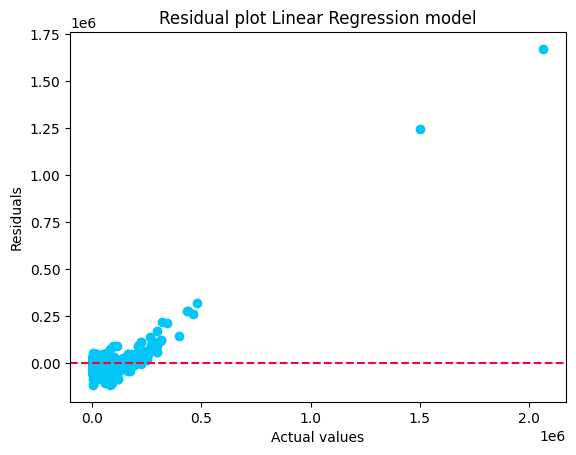

In [55]:
# Create residual plot for residuals vs. the actual values of Linear Regression model
residuals = y_test - y_pred

plt.scatter(y_test, residuals, color='#02c6f7')
plt.axhline(y=0, color='#f7023c', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual plot Linear Regression model')

plt.show()